In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("datasets/michelson_speed_of_light_sample.csv",index_col=0)

In [3]:
data.head()

,Expt,Run,Speed
1,1,1,850
2,1,2,740
3,1,3,900
4,1,4,1070
5,1,5,930


In [4]:
speed=data['Speed']

### function to calculate ECDF

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Now we will do bootstrap sampling from the given data of speed and see how the ECDF and CDF differe and also make a probabilistic decision of out data.

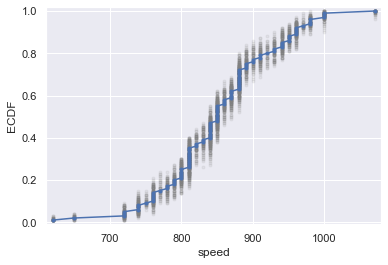

In [6]:
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(speed, size=len(speed))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(speed)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('speed')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

### Calculating the mean of the bootstrap replica sample and SEM and comparing it with the original data set SEM and plotting the histogram of the mean of bootstrap sample..

7.861450247886836
7.82395838290951


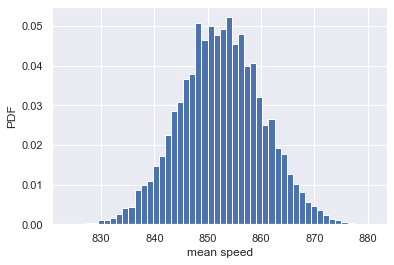

In [7]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates



# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(speed,np.mean,10000)

# Computing and printing the STANDARD ERROR OF MEAN(SEM) of orginal data sample
sem = np.std(speed) / np.sqrt(len(speed))
print(sem)

# Computing and printing standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)/np.sqrt(len(bs_replicates)) *100
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean speed')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

### Confidence intervals of speed data
Now we can calculate the confidence level of the speed data by using the , np.percentile()  function.so, calculate the confidence interval of 95% , we take the percentile , 2.5 and 97.5 , of the bs_replicates .

In [8]:
np.percentile(bs_replicates,[2.5,97.5])

array([837.2, 867.9])

### Therefour, the 95% confidence interval of our dataset is [837., 867.9] . 

### Calculating the variance of the bootstrap sample replicas , and Dividing the variance replicates (bs_replicates) by 100 to put the variance in units of square centimeters for convenience.

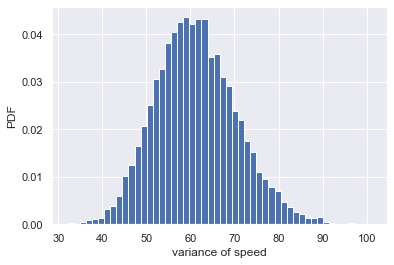

In [9]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(speed,np.var,10000)

# Put the variance in units of square centimeters
var_replicates=bs_replicates/100

# Make a histogram of the results
_ = plt.hist(var_replicates, density=True, bins=50)
_ = plt.xlabel('variance of speed')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


This is not normally distributed, as it has a longer tail to the right. Note that you can also 
compute a confidence interval on the variance, or any other statistic, using np.percentile() 
with your bootstrap replicates